In [1]:
import pandas as pd

data = pd.read_excel("other-airports.xls", header=2)
data_other = pd.DataFrame(data, columns=["Code", "Pax 2017"]).rename(columns={"Pax 2017": "Passengers"})

data = pd.read_excel("american-airport.xls", header=2, sheet_name="2017 pax")
data_america = pd.DataFrame(data, columns=["Code", "Pax 2016"]).rename(columns={"Pax 2016": "Passengers"})

data = pd.read_excel("european-airports.xls", header=2)
data_europe = pd.DataFrame(data, columns=["Code", "Pax 2017"]).rename(columns={"Pax 2017": "Passengers"})

dataset = data_other.append(data_america).append(data_europe)

# dataset[dataset['Code'].isnull()]
dataset = dataset.dropna();
dataset = dataset.sort_values(by=["Code"])

max = dataset['Passengers'].max()

dataset["Passengers"] = dataset["Passengers"] / max

passengerSet = dataset

# dataset["Passengers"].sort_values()


In [2]:
data = pd.read_csv("airports.dat", header=-1)
airports = pd.DataFrame(data, columns=[0, 4]).rename(columns={0: "Id", 4: "Code"})
airports = airports[airports.Code != "\\N"]


In [3]:
data = pd.read_csv("routes.dat", header=-1)
routes = pd.DataFrame(data, columns=[2, 4]).rename(columns={2: "From", 4: "To"})


In [4]:
import networkx as nx


tuples = [tuple(x) for x in routes.values]

G = nx.Graph()
G.add_edges_from(tuples)

In [5]:
%matplotlib notebook

import matplotlib.pyplot as plt
import math

import matplotlib
import matplotlib.cm as cm

def convert(name):
    airport = passengerSet[passengerSet.Code == name]
    if (len(airport.Code) > 0):
        return airport.iat[0, 1]
    else:
        return 0

value = [math.sqrt(convert(node)) for node in G.nodes()]


In [ ]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=1, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.inferno_r)

colors = [mapper.to_rgba(c) for c in value]

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.get_cmap('jet'), node_size=20)  #
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=False)
plt.show()


In [6]:
airports

,Id,Code
0,1,GKA
1,2,MAG
2,3,HGU
3,4,LAE
4,5,POM
5,6,WWK
6,7,UAK
7,8,GOH
8,9,SFJ
9,10,THU


<IPython.core.display.Javascript object>


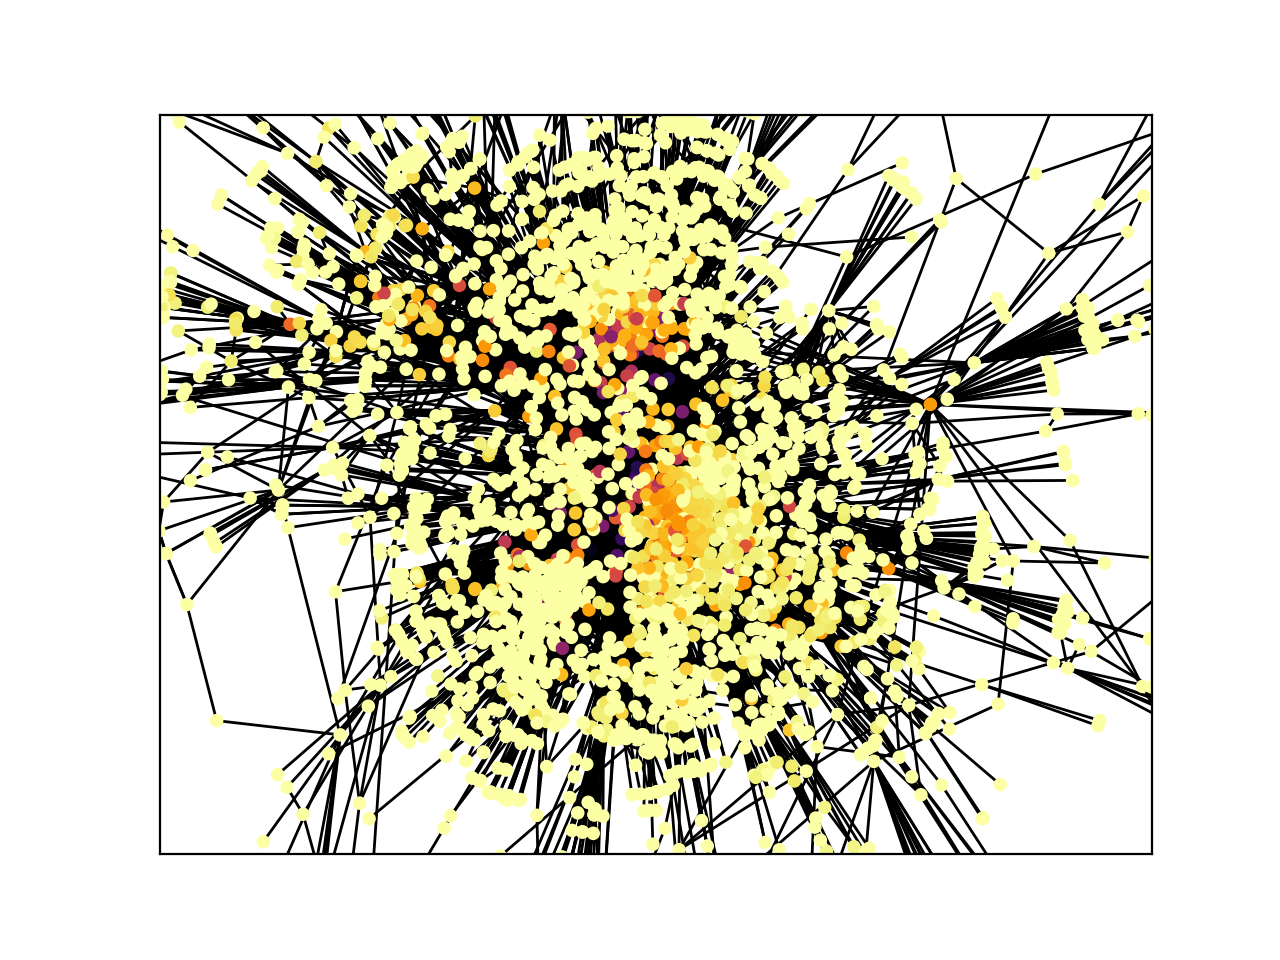

In [178]:
# maxval = max()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# print "Degree sequence", degree_sequence
maxd = degree_sequence[0]

centr_val = [math.sqrt(node / maxd) for _, node in G.degree()]

comb_val = [(v + cv) / 2 if v != 0.0 else cv for v, cv in zip(value, centr_val)]

norm = matplotlib.colors.Normalize(vmin=0, vmax=1, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.inferno_r)

comb_col = [mapper.to_rgba(c) for c in comb_val]

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.get_cmap('jet'), node_size=15)  #
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=False)
plt.show()